Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Datasets

In [4]:
train_path = "/content/drive/MyDrive/Data Science Life Cycle/traincsv.csv"
train_df = pd.read_csv(train_path)

print("Train Dataset")
display(train_df.head())

Train Dataset


<ipython-input-4-928906915cfa>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path)


,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales,cluster_catgeory
0,10493832.0,Kelaniya,1209.6,756.0,5292.0,4
1,10178643.0,Moratuwa,1590.12,1060.08,6007.12,1
2,10513916.0,Wattala,2288.88,1481.04,9155.52,4
3,10334589.0,Wattala,2274.94,1739.66,9099.76,4
4,10458365.0,Kelaniya,2345.49,2069.55,9243.99,4


Display Basic Information

In [5]:
print("Train Dataset Info:")
train_df.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


Checking for missing values

In [6]:
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())


Missing Values in Train Data:
Customer_ID          2
outlet_city          2
luxury_sales        35
fresh_sales         41
dry_sales           30
cluster_catgeory     1
dtype: int64


Summary Statictics

In [7]:
print("\nSummary Statistics (Train Dataset):")
print(train_df.describe())


Summary Statistics (Train Dataset):
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07


Visualizing Missing Values

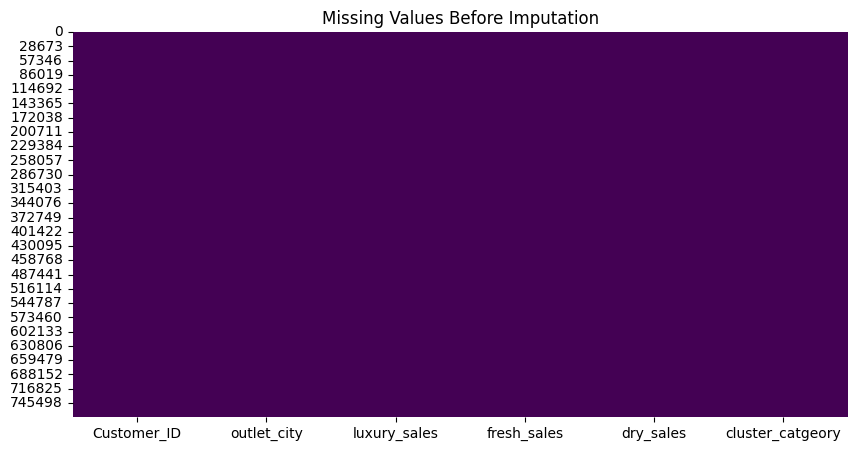

In [8]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Before Imputation")
plt.show()

Convert sales columns to numeric(train dataset)

In [9]:
sales_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']
train_df[sales_cols] = train_df[sales_cols].apply(pd.to_numeric, errors='coerce')

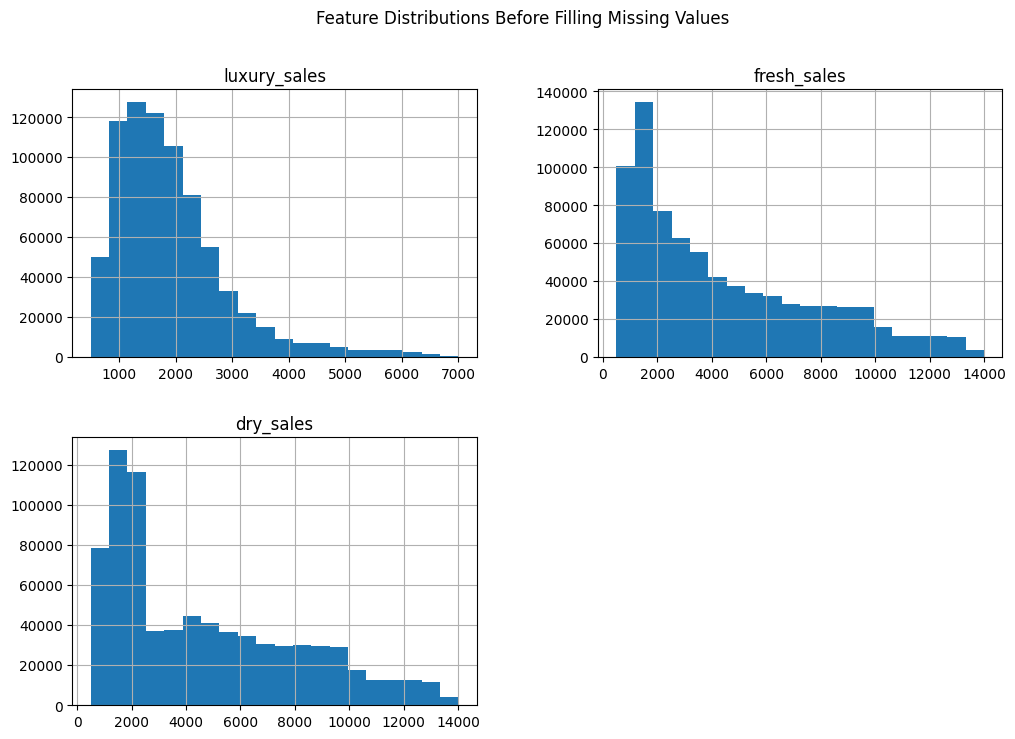

In [10]:
numeric_cols = train_df.drop(columns=['Customer_ID']).select_dtypes(include=['number']).columns

train_df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions Before Filling Missing Values")
plt.show()

Boxplots to Identify Outliers

Fill missing values for categorical columns with the mode

In [12]:
train_df.loc[:, 'outlet_city'] = train_df['outlet_city'].fillna(train_df['outlet_city'].mode()[0])


Fill missing values for numerical columns with the median

In [13]:
for col in sales_cols:
    train_df.loc[:, col] = train_df[col].fillna(train_df[col].median())

Drop rows where Customer_ID is missing

In [14]:
train_df = train_df.dropna(subset=['Customer_ID'])

Drop rows where the target variable is missing

In [15]:
train_df.dropna(subset=["cluster_catgeory"], inplace=True)

In [16]:
print("\nMissing Values Count After Filling for train dataset:")
print(train_df.isnull().sum())


Missing Values Count After Filling for train dataset:
Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


Check for duplicate rows

In [17]:
print("Duplicate Rows in Train Data:", train_df.duplicated().sum())

Duplicate Rows in Train Data: 0


Get all unique values in cluster_category (target variable)

In [18]:
print("\nUnique Cluster Categories:\n", train_df["cluster_catgeory"].unique())

print("Cluster Category Counts:\n", train_df["cluster_catgeory"].value_counts())


Unique Cluster Categories:
 ['4' '1' '99' '2' '5' '3' '6' '6\\' 4 2 1 95 3 98 5 6 100.0 89.0]
Cluster Category Counts:
 cluster_catgeory
1        188973
6        169206
2        155060
4        131039
3         48906
4         41400
5         39531
1             9
5             9
6             8
2             4
6\            1
99            1
3             1
98            1
95            1
100.0         1
89.0          1
Name: count, dtype: int64


Fixing Cluster Category Inconsistencies

In [19]:
# Convert cluster category to integer to remove inconsistencies
train_df["cluster_catgeory"] = pd.to_numeric(train_df["cluster_catgeory"], errors="coerce").astype("Int64")

# Drop remaining rare clusters (89, 95, 98, 99, 100)
train_df = train_df[~train_df["cluster_catgeory"].isin([89, 95, 98, 99, 100])]

# Drop NaN values in cluster category
train_df = train_df.dropna(subset=["cluster_catgeory"])

# Convert back to categorical
train_df["cluster_catgeory"] = train_df["cluster_catgeory"].astype("category")

# Verify cleaned cluster categories
print("Final Unique Cluster Categories:", train_df["cluster_catgeory"].unique())
print("\nFinal Cluster Counts:\n", train_df["cluster_catgeory"].value_counts())

Final Unique Cluster Categories: [4, 1, 2, 5, 3, 6]
Categories (6, Int64): [1, 2, 3, 4, 5, 6]

Final Cluster Counts:
 cluster_catgeory
1    188982
4    172439
6    169214
2    155064
3     48907
5     39540
Name: count, dtype: int64


Check if Customer_IDs are unique

In [20]:
print("\nNumber of Unique Customer IDs in Train:", train_df["Customer_ID"].nunique(),
      "out of", len(train_df), "rows")


Number of Unique Customer IDs in Train: 774146 out of 774146 rows


In [21]:
# Convert Customer_ID to string and remove any decimals
train_df["Customer_ID"] = train_df["Customer_ID"].astype("Int64")

# Check sample values
print("Cleaned Customer_ID sample:", train_df["Customer_ID"].sample(10).tolist())

Cleaned Customer_ID sample: [10117347, 10149431, 10068080, 10694595, 10011535, 10443330, 10436036, 10205806, 10487863, 10238921]


Get all unique values in Outlet City

In [22]:
print("\nUnique Outlet Cities in Train Data:\n", train_df["outlet_city"].unique())


Unique Outlet Cities in Train Data:
 ['Kelaniya' 'Moratuwa' 'Wattala' 'Homagama' 'Dehiwala-Mount Lavinia'
 'Panadura' 'Kaduwela' 'Peliyagoda' 'Kotte' 'Nuwara Eliya' 'Batticaloa'
 'Colombo' 'Jaffna' 'Gampaha' 'Kalmunai' 'Galle' 'Katunayake' 'Negombo'
 'Trincomalee' 'Kandy']


Standardize Outlet City Names

In [23]:
# Convert to lowercase for consistency
train_df["outlet_city"] = train_df["outlet_city"].str.lower()

# Verify unique values after fixing
print("Cleaned Unique Outlet Cities in Train Data:\n", train_df["outlet_city"].unique())

Cleaned Unique Outlet Cities in Train Data:
 ['kelaniya' 'moratuwa' 'wattala' 'homagama' 'dehiwala-mount lavinia'
 'panadura' 'kaduwela' 'peliyagoda' 'kotte' 'nuwara eliya' 'batticaloa'
 'colombo' 'jaffna' 'gampaha' 'kalmunai' 'galle' 'katunayake' 'negombo'
 'trincomalee' 'kandy']



Check for Negative Sales Values

In [24]:
sales_cols = ["luxury_sales", "fresh_sales", "dry_sales"]
for col in sales_cols:
    negative_values = train_df[train_df[col] < 0]
    print(f"\nNegative Values in {col}: {negative_values.shape[0]} rows")


Negative Values in luxury_sales: 0 rows

Negative Values in fresh_sales: 0 rows

Negative Values in dry_sales: 0 rows


In [25]:
print("Train Dataset Data Types:")
print(train_df.dtypes)

Train Dataset Data Types:
Customer_ID            Int64
outlet_city           object
luxury_sales         float64
fresh_sales          float64
dry_sales            float64
cluster_catgeory    category
dtype: object


Convert outlet_city column to category

In [26]:
train_df['outlet_city'] = train_df['outlet_city'].astype('category')

In [27]:
print("\nUpdated Data Types:")
print(train_df.dtypes)


Updated Data Types:
Customer_ID            Int64
outlet_city         category
luxury_sales         float64
fresh_sales          float64
dry_sales            float64
cluster_catgeory    category
dtype: object


Remove Outliers Using IQR Method

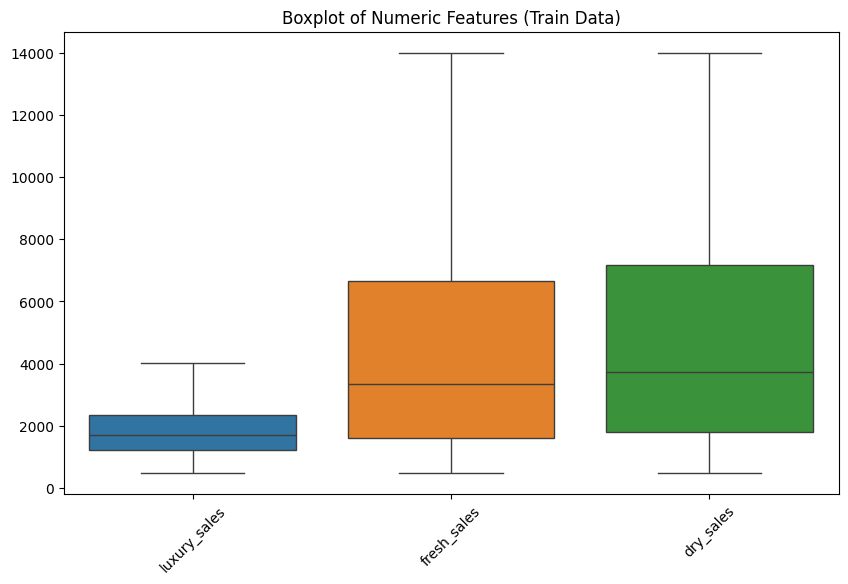

In [29]:
numeric_cols = ['luxury_sales', 'fresh_sales', 'dry_sales']

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above the upper bound
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply IQR capping to all sales columns
for col in ['luxury_sales', 'fresh_sales', 'dry_sales']:
    cap_outliers(train_df, col)

# Verify changes with a new boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[numeric_cols])
plt.title("Boxplot of Numeric Features (Train Data)")
plt.xticks(rotation=45)
plt.show()

Encoding

In [30]:
print("\nUnique outlet_city values in Train:", train_df['outlet_city'].nunique())
print(train_df['outlet_city'].value_counts())


Unique outlet_city values in Train: 20
outlet_city
colombo                   41033
batticaloa                41012
galle                     41009
kalmunai                  40710
negombo                   40703
jaffna                    40674
katunayake                40648
kandy                     40534
trincomalee               40527
gampaha                   40252
peliyagoda                37151
nuwara eliya              37102
dehiwala-mount lavinia    36837
kotte                     36788
panadura                  36726
wattala                   36721
kaduwela                  36695
homagama                  36638
moratuwa                  36416
kelaniya                  35970
Name: count, dtype: int64


Encoding using labelencoder

In [31]:
from sklearn.preprocessing import LabelEncoder
import pickle

# Initialize Label Encoder
le_outlet = LabelEncoder()

# Fit & transform on train data
train_df["outlet_city_encoded"] = le_outlet.fit_transform(train_df["outlet_city"])

# Save the encoder for consistency with test data
with open("label_encoder_outlet.pkl", "wb") as f:
    pickle.dump(le_outlet, f)

# Verify encoding
print("\nEncoded Outlet City in Train Data:")
print(dict(zip(le_outlet.classes_, le_outlet.transform(le_outlet.classes_))))


Encoded Outlet City in Train Data:
{'batticaloa': np.int64(0), 'colombo': np.int64(1), 'dehiwala-mount lavinia': np.int64(2), 'galle': np.int64(3), 'gampaha': np.int64(4), 'homagama': np.int64(5), 'jaffna': np.int64(6), 'kaduwela': np.int64(7), 'kalmunai': np.int64(8), 'kandy': np.int64(9), 'katunayake': np.int64(10), 'kelaniya': np.int64(11), 'kotte': np.int64(12), 'moratuwa': np.int64(13), 'negombo': np.int64(14), 'nuwara eliya': np.int64(15), 'panadura': np.int64(16), 'peliyagoda': np.int64(17), 'trincomalee': np.int64(18), 'wattala': np.int64(19)}


Save the processed dataset

In [32]:
output_path = "/content/drive/MyDrive/Data Science Life Cycle/processed_Train_data.csv"
train_df.to_csv(output_path, index=False)